Example 1

Concepts for learning

In [1]:
import numpy as np

def to_01(arr):
    return ''.join(['{0:08b}'.format(x) for x in arr.astype(np.uint8)])

def from_01(binary_str):
    n = 8
    return np.array([int(binary_str[i:i+n], 2) for i in range(0, len(binary_str), n)], dtype=np.uint8)

# a = np.array([3, 5])
# s = to_01(a)
# print(s, from_01(s))

In [2]:
rng = np.random.RandomState(42)
n = 50
samples = []
samples_b = []
for i in range(n):
    a0 = rng.randint(32)
    a1 = rng.randint(32)
    samples.append([a0, a1])
for a0, a1 in samples:
    ge = '0' if a0 < a1 else '1'
    a = np.array([a0, a1])
    s = to_01(a)
    samples_b.append(s)
    print(s+ge)




00000110000100110
00011100000011101
00001010000001111
00011100000101001
00000110000110010
00010010000101100
00001010000010101
00010111000101001
00000011000001110
00010111000000101
00010101000101001
00000001000101110
00001011000111010
00000101000000011
00011111000110111
00010100000000001
00001011000110010
00010101000111000
00001011000110000
00010000000110100
00011010000111100
00001001000111110
00011011000110111
00001111000011101
00011101000111011
00001110000111010
00010010000010111
00010110000100111
00011111000110001
00000010000001000
00010010000001101
00010100000010001
00000110000100010
00000011000110000
00011011000011011
00010001000110010
00001000000110010
00010100000000011
00010011000110110
00001110000110110
00000110000010110
00011100000001111
00001110000000101
00001101000100000
00000011000100010
00000111000000111
00000001000111010
00000101000101010
00001001000000111
00010101000111000


In [3]:
for s in samples_b:
    a0, a1 = from_01(s)
    ge = '0' if a0 < a1 else '1'
    print(f"{a0:4d} {a1:4d}", ge)

   6   19 0
  28   14 1
  10    7 1
  28   20 1
   6   25 0
  18   22 0
  10   10 1
  23   20 1
   3    7 0
  23    2 1
  21   20 1
   1   23 0
  11   29 0
   5    1 1
  31   27 1
  20    0 1
  11   25 0
  21   28 0
  11   24 0
  16   26 0
  26   30 0
   9   31 0
  27   27 1
  15   14 1
  29   29 1
  14   29 0
  18   11 1
  22   19 1
  31   24 1
   2    4 0
  18    6 1
  20    8 1
   6   17 0
   3   24 0
  27   13 1
  17   25 0
   8   25 0
  20    1 1
  19   27 0
  14   27 0
   6   11 0
  28    7 1
  14    2 1
  13   16 0
   3   17 0
   7    3 1
   1   29 0
   5   21 0
   9    3 1
  21   28 0


Matplotlib is building the font cache; this may take a moment.


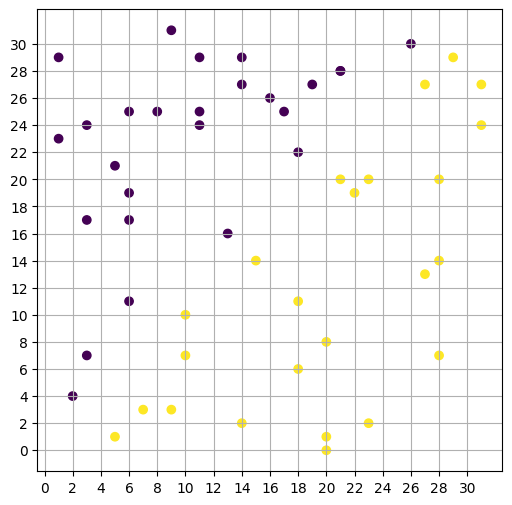

In [5]:
import matplotlib.pyplot as plt
samp_arr = np.array(samples)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(samp_arr[:, 0], samp_arr[:, 1], c=samp_arr[:, 0]>=samp_arr[:, 1])
ax.grid('on')
ax.set_xticks(np.arange(0, 32, 2))
ax.set_yticks(np.arange(0, 32, 2))
plt.show()

Example 2

Let us do a model manually

$w1 * x1 + w2 * x2 + ... > 0$

In [6]:
# check samples_b contains binary string
# samples contains the numbers
samples_b[0], samples[0]

('0000011000010011', [6, 19])

In [8]:
def bitstr_to_bits(s):
    return np.array([int(c) for c in s]).astype(np.float64)

In [9]:
w_tmp = np.power(2, np.arange(7, -1, -1))
w = np.concatenate([w_tmp, -w_tmp])
print("Weights", w)
print("Weights working on the first 10 samples")
for i in range(10):
    xbits = bitstr_to_bits(samples_b[i])
    a0, a1 = samples[i]
    print(i, f"<W,Bits> {(w*xbits).sum()} >= 0?", (w*xbits).sum()>=0, f"a0({a0})>=a1({a1})?", a0>=a1)

Weights [ 128   64   32   16    8    4    2    1 -128  -64  -32  -16   -8   -4
   -2   -1]
Weights working on the first 10 samples
0 <W,Bits> -13.0 >= 0? False a0(6)>=a1(19)? False
1 <W,Bits> 14.0 >= 0? True a0(28)>=a1(14)? True
2 <W,Bits> 3.0 >= 0? True a0(10)>=a1(7)? True
3 <W,Bits> 8.0 >= 0? True a0(28)>=a1(20)? True
4 <W,Bits> -19.0 >= 0? False a0(6)>=a1(25)? False
5 <W,Bits> -4.0 >= 0? False a0(18)>=a1(22)? False
6 <W,Bits> 0.0 >= 0? True a0(10)>=a1(10)? True
7 <W,Bits> 3.0 >= 0? True a0(23)>=a1(20)? True
8 <W,Bits> -4.0 >= 0? False a0(3)>=a1(7)? False
9 <W,Bits> 21.0 >= 0? True a0(23)>=a1(2)? True


Example 3

Let us try to guess the $w$ parameters automatically.

Basically, we give a "reckless enough W" that "fights with" a data sample a high energy. 

Then we let the system "relax" -- by having it "lazily go to low energy status".

In [ ]:
rng = np.random.RandomState(42)
n = 100
samples = []
samples_b = []
for i in range(n):
    a0 = rng.randint(32)
    a1 = rng.randint(32)
    samples.append([a0, a1])
for a0, a1 in samples:
    ge = '0' if a0 < a1 else '1'
    a = np.array([a0, a1])
    s = to_01(a)
    samples_b.append(s)
    print(s+ge)

Define an "energy" term:

If $y$ and $\langle x, w \rangle$ do not agree, then

$E(x;w) = |\langle x, w \rangle| $

In [ ]:
# compute the energy 
def mod_eng_persample(sample, w):
    x, y = sample

    if ((x * w).sum() >= 0 and y == 0) or ((x*w).sum() < 0 and y == 1):
        return abs((x*w).sum())
    else:
        return 0

# compute the energy per sample
def mod_eng(w):
    e = 0
    for i in range(len(samples)):
        xbits = bitstr_to_bits(samples_b[i])
        a0, a1 = samples[i]
        y = 1 if a0>=a1 else 0
        e += mod_eng_persample((xbits, y), w)
    return e

    

rng = np.random.RandomState(42)
w0 = rng.randn(16)

dt = 0.1
beta = 0.1
w = w0
for t in range(20):
    dw = rng.randn(100, len(w)) * dt
    w_candi = dw + w

    # compute the energies for each new proposal
    energies = np.array([mod_eng(w_) for w_ in w_candi])

    j = np.argmin(energies) # this == \beta = \infity (99999)
    w = w_candi[j]
    print(j, energies[j])




In [ ]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(w)), w)
plt.grid('on')

In [ ]:
n = 100
samples_test = []
samples_b_test = []
for i in range(n):
    a0 = rng.randint(32)
    a1 = rng.randint(32)
    samples_test.append([a0, a1])
for a0, a1 in samples_test:
    ge = '0' if a0 < a1 else '1'
    a = np.array([a0, a1])
    s = to_01(a)
    samples_b_test.append(s)

print("Check model on new samples")
corr_test = 0
for i in range(len(samples_test)):
    xbits = bitstr_to_bits(samples_b_test[i])
    a0, a1 = samples_test[i]
    corr = ((w*xbits).sum() >= 0) == (a0 >= a1)
    corr_test += int(corr)
    if i<10:
        print(i, f"<W,Bits> {(w*xbits).sum()}", a0, a1)
        print(f"\t Is the model getting the concept correctly? {corr}")
print(corr_test, f"samples are correctly compared in {n} test samples")



Example 4

Hmm...

To prepare the data in slides

In [10]:
import os
import numpy as np
from PIL import Image

# Define the directories
duck_dir = 'Data/DuckImages/Ducks'
cow_dir = 'Data/DuckImages/Cows'

# Function to load and preprocess images
def load_and_preprocess_images(directory, label):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.webp'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path).convert('RGB')
            image = image.resize((16, 16))
            image = np.array(image).astype(np.uint8)
            images.append(image)
    return np.array(images)

# Load and preprocess images
cow_images = load_and_preprocess_images(cow_dir, 0)
duck_images = load_and_preprocess_images(duck_dir, 0)
imc = cow_images[5]
im0 = duck_images[2]

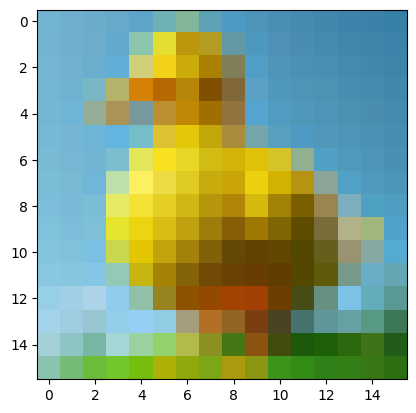

In [11]:
plt.imshow(im0)

In [12]:
# output to 01 strings
with open('tmp01.txt', 'w') as f:
    for r in range(16):
        f.write(to_01(im0[r].flatten()))
        f.write('\n')

To reveal what is in the slides

In [13]:
import matplotlib.pyplot as plt

[113 180 208]


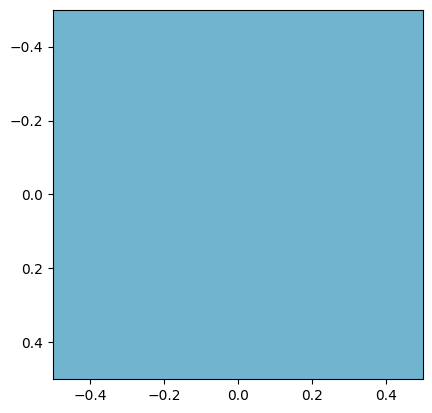

In [14]:
cb0 = from_01('011100011011010011010000')
print(cb0)
cb0 = cb0.reshape((1, 1, 3))
plt.imshow(cb0)

[ 97 181 224 117 190 199 220 193  48]


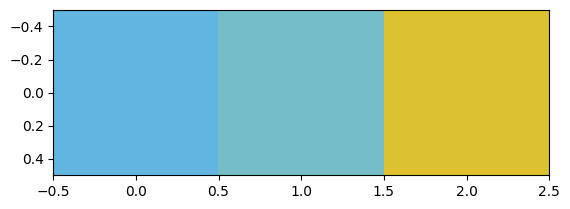

In [15]:
cb1 = from_01('011000011011010111100000011101011011111011000111110111001100000100110000')
print(cb1)
cb1 = cb1.reshape((1, 3, 3))
plt.imshow(cb1)

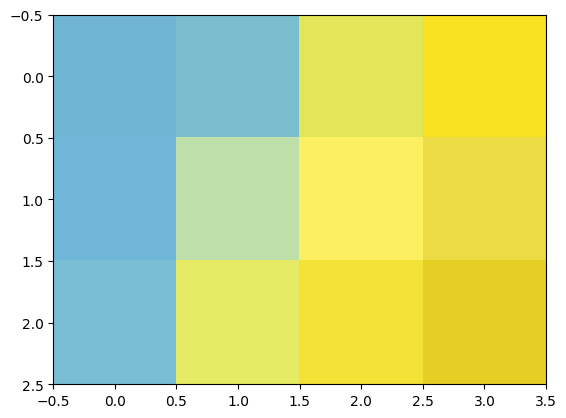

In [16]:
cb2 = from_01('011100011011010111010100011110101011111011010000111000111110011001011000111110001110000100100001011100001011011011011000101111111101111110101010111111001111000001100000111011011101101101000101011110101011111011010110111001011110101101100100111101001110001000110110111001101100111100100101')
cb2 = cb2.reshape((3, 4, 3))
plt.imshow(cb2)

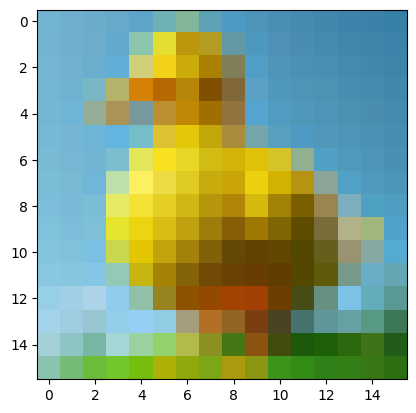

In [17]:
cb4 = from_01('011100011011010011010000011011111010111111001101011010111010110011001011011001111010100111001001010111011010010011001010011011101011000110110100100000011011011010011001010111001010001010110100010011001001100111000001010011011001010010111000010010001000111110110011010001011000101110101111010000011000100010101100001111101000010010101010001110101000001010100111001101100111111110100110011100111011010111010000011100011011000011001100011011001010110111001010011000111010100011001101100011001100011010101100111000111101111000110000101110111001100000001011101100111001110000100010011000111001100110100100010011011001100010111110010011011001001010110100010010011000111010110010010001011000101110101110010000011000011110101011001111111000010110101001001110111000001110101000011101001011011011010001011100011011000111001101011010101010111011001110011000001010111011010110110011111101000001111001111100011101000100011010110010101010101100001010101010110111111100000000100000010111111001011010010100001001110111000101010011101001010110110111010011001001000110110100010010011000111110110001010001011000101110101110010000101000100010101100001111101000010110101010011101001011011011010010011011111011001011010000011110001011010111000101101101001011001101101001110101001000000100000110101101100110100100000010101101111000011000001000100000000101000000000000100000000110100000111000010110111010000111000100010011101001100010111011010011101001010010110110010011001001001010110011010010001000111010110001010001011000101110101110010000001000100010101100011101011011011111010011011011111011011011010110100101001010110110010111101010101001001101010111011101111001100010011100101110111001000000110000101111111000011100000100101000000110111100000000100100110111010000111111010101001010010011001111010100001001110011000000010100001001100010111001010011011001010110110110010010111001000110110010010010011000111010101111010000111000101110101111011101101011100111010100011101011011011011010010011011101011010111010101011000011011010111100000011101011011111011000111110111001100000100110000111001001100011100001000110000111010011100001010101010011000110000111100011100111010010110101010010110001010000011000000010011011001101111000100010011111001100010111010010011011001010110110110010010101001001010110100010001101000111010110010011110011011101111010101011101101011011111010011011100011011010111010100011110101011111011010000111000111110011001011000111110001110000100100001111010001101011000100100110100101011110000010011110100101011001100000110111000001100000000001000110101001100010000101001100100001011000010001111010100001001111111000101010011111001100110111011010011011001010110110111010010011001000110110100011110101011110111010111011110001011100111010011011100001011011011011000101111111101111110101010111111001111000001100000111011011101101101000101111000001100101100100011110001101010110100001101110010011010010100001001111010101101000000001111110100101011001000000000101101101001001100010011100011001010001110010111010100011010000011000110010100001001101010111101010010111001011010111001011111001011111011011001011110011011101111010110011110101011111011010110111001011110101101100100111101001110001000110110111001101100111100100101110100011011011100010100101101101001011000001011101100011000011000001000110101101011100100001100101000111000001100000101011110110101111000000000100110101000010001010000011111001010111010111110010011111010000111000010010011111001110111000001011111111100001011011011011111001011111011011001011111101100000111010110111001101110010100101110111011001101010100010000110110001011111000010010101111111010000100001111100111110111110100001100100001010101111000000110100111100111100000000011100000000110010100000011010111110100110000000000011101110110110000111010101100101011001010001001101000001011011101111110010011111010001011001011100001001100010111011110100000011100001011011011011110111100000111100011110010011101011001001111111000011100011000000001110000011010010000001101101000111000001000001100100000100110001000001001011000110100100100000100011000010100001000000010011000100100011100000001010101000100100000000000011001000101111100011011100110101001001101110010100001101010100110100100010101011010101011010010100010101100100011100001100001111100011011011111100001011100011011100110100100111100100110111001110001101011010000010000101001001000001000000100100001010110010000001001011100010100101100000101011010010100000100000011011010010011110000000011011000010011110100000010010101000100100000000000010111110101100100001010011101101001101010001010011010011010110011000101011001101010011010110100100101101100111111100111101000011101000011100110101011001101001111101000100100011100110011101100100100011100000010101001100101111000001100011111100011110101001100000000100101010100100000000001101000110100001000000001101000000100000000000010011011000011111100000001010001010100110000010101011001111001000010000000011110111100001011100110011000111010110010111100010110001001101010010011101001001101010011101001100111111100110111100000100101111100011011010000100101011100111011101011100101011100111111110101100100011100101111100100101001001001110101111100101100110110111100100101100100100110010100100011011110110011111000010000010010110100000100100101010001100111001101101101010111101001011010011010011001101010000010100010010101111001100110000101001111000111011101010110101000101101000011010110100011101100010011000011011101111011011010100011101001001101011011010101100110011101001010011111100100111101000101101011101100101011101001001001100011001001000000100000010001110111011100010100100010100101001100010000010000100100110000001111000111010101100100001011000111100110000000001001001011010110100000001110001111110111001100010111001000010101110000011000100011001100001010110000011101011011101101110110011011011011110000111001011100111100011000101011011101101011111000001101101011001011000000000111100100011010100000001101011110011010011100010101101010111001101000001101100011001001010100010010001111011001010000011010001100111000110000011000001011111000000000010111001100110111111000010101001101110111011100010101001010110110111100010001')
cb4 = cb4.reshape((16, 16, 3))
plt.imshow(cb4)

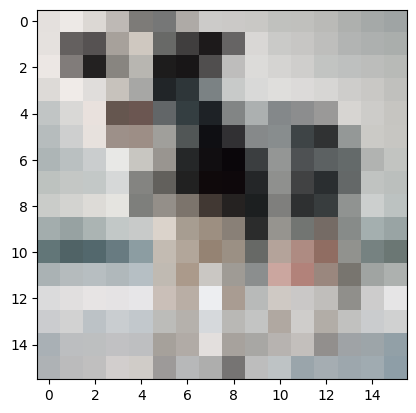

In [18]:
plt.imshow(imc)